# Sistemas dimámicos dos dimensionales

In [26]:
using PyPlot

In [27]:
function metodo_RK4(f,x0,ti,tf,n)
    #Buscamos h
    h=(tf-ti)/n
    #Hacemos el primer intervalo
    listt=linspace(ti,tf,n+1)
    listx=[]
    #Tomamos el primer valor de x0 en la lista solución
    push!(listx,x0)
    x=x0
    #Método de Runge-kutta orden 4
    for i in 1:length(listt)-1
        k1=f(x,listt[i])
        k2=f(x+(h/2)*k1,listt[i]+(h/2))
        k3=f(x+(h/2)*k2,listt[i]+(h/2))
        k4=f(x+h*k3,listt[i+1])
        y=x+(h/6)*(k1+2*k2+2*k3+k4)
        #Se incerta en la lista
        push!(listx,y)
        #Se puede omitir
        x=y
    end
    return listt,listx
end

function metodo_RK4h(f,xi,ti,tf,h)
    #Calculo de n dado h
    n=Int(round((tf-ti)/h))
    return metodo_RK4(f,xi,ti,tf,n)
end;

In [28]:
function graph(F,Ti,Tf,H,N,L)
    for i in 1:N
        X1=((rand(1)-rand(1))*L)[1]
        Y1=((rand(1)-rand(1))*L)[1]
        X0=[X1;Y1]
        DATO_i=metodo_RK4h(F,X0,Ti,Tf,H)
        plot(map(x->x[1],DATO_i[2]),map(x->x[2],DATO_i[2]))
    end
    gca()[:set_xlim]((-L,L))
    gca()[:set_ylim]((-L,L))

    title("Retrato Fase")
    legend()
    xlabel("X(t)")
    ylabel("Y(t)")
    grid("on")
    return show()
end;

------------
__Ejercicio 1:__ Resolver con Runge-Kutta orden 4 el sistema:
\begin{align*}
\dot x &= y-y^3\\
\dot y &= -x -y^2
\end{align*}

* Calculen el Jacobiano de $\vec F=\left(y-y^3,-x-y^2 \right)^{\text{T}}$ y evaluenlo en $\vec 0$, el cual es un punto fijo. Calculen $\Delta$ y $\tau$ e indiquen que tipo de punto fijo es el $\vec 0$.

In [37]:
using SymPy

In [38]:
f1(x)=[x[2]-x[2]^3,-x[1]-x[2]^2]
x=symbols("x")
y=symbols("y")
v=[x,y]
f1(v)

2-element Array{SymPy.Sym,1}:
 -y^3 + y
 -x - y^2

$$Df(\vec x)=\left(\begin{array}{cc} \frac{\partial F_x}{\partial x} & \frac{\partial F_y}{\partial dx} \\ \frac{\partial F_x}{\partial dy} & \frac{\partial F_y}{\partial dy} \end{array}\right) \rightarrow
Df(\vec x)=
\left(\begin{array}{cc} 0 & -3y^2+1\\
-1 & -2y
\end{array}\right)$$
$$tr(Df)=-2y$$
$$|Df|=-3y^2+1$$

Así en el punto 0 tenemos que se trata de un centro.

-------
* Grafiquen muchas trayectorias en el espacio de fase, utilizando condiciones iniciales aleatorias.

__Ejercicio 3:__ Graficar muchas trayectorias del sistema del ejercicio 1 en el espacio de fase. Utílicen rangos apropiados de acuerdo a donde vimos que estan los puntos fijos.

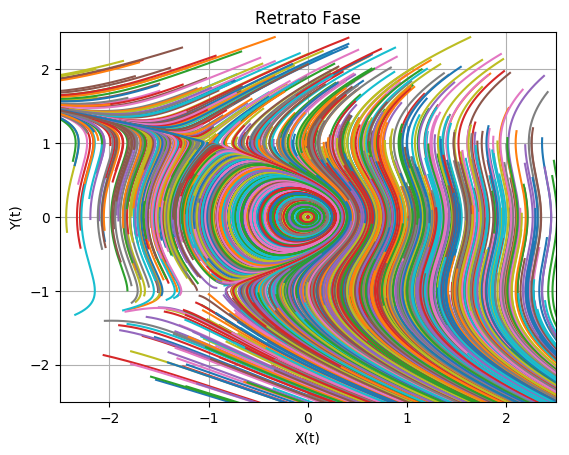

In [13]:
F1(x,t)=[x[2]-x[2]^3,-x[1]-x[2]^2]
T1i=0
T1f=10
H1=.001
N1=2000
L1=2.5
graph(F1,T1i,T1f,H1,N1,L1)

----------
__Ejercicio 2:__ Resolver usando Runge-Kutta orden 4 para resolver el oscilador de van der Pol:
$${d^2x \over dt^2}-\mu(1-x^2){dx \over dt}+x= 0$$
* Graficar muchas trayectorias, construidas a partir de condiciones iniciales aleatorias, en el espacio de fase. Observa alguna estructura en particular?
* Usen $\mu=0.5$.
* Grafiquen varias trayectorias en los espacios $(x,t)$ y $(y=\dot x,t)$.

$$\ddot{x}-μ(1-x^2)\dot{x}+x=0$$
Hacemos $y=\dot{x} \rightarrow \dot{y}-μ(1-x^2)y+x=0$  
Así:
$$\dot{x}=y; \dot{y}=μ(1-x^2)y-x$$
$$F(x,y)=\frac{dX}{dt}=(y)$$

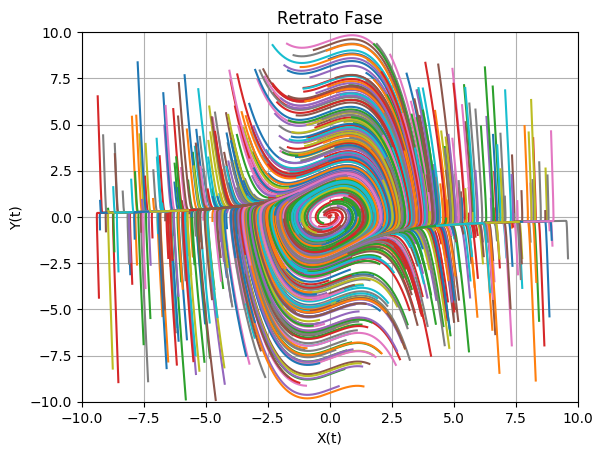

In [17]:
μ=0.5
F(x,t)=[x[2],μ*(1-(x[1])^2)*x[2]-x[1]]
Ti=0
Tf=5
H=.001
N=1000
L=10
graph(F,Ti,Tf,H,N,L)

Se observan espiras, y se puede apreciar como todos los puntos convergen hacia esa estructura.

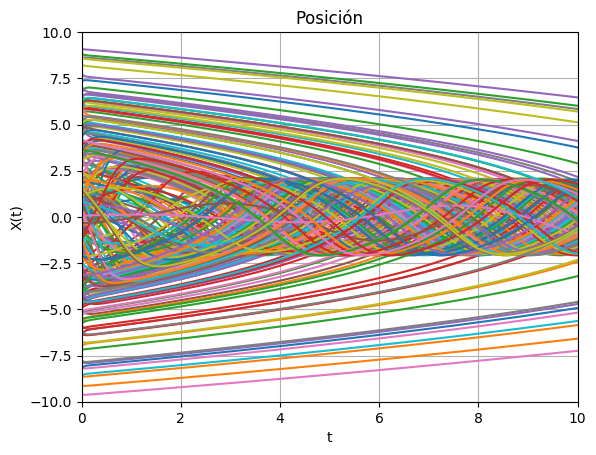

In [18]:
for i in 1:Int(round(N/4))
    X1=((rand(1)-rand(1))*L)[1]
    Y1=((rand(1)-rand(1))*L)[1]
    X0=[X1;Y1]
    DATO_i=metodo_RK4h(F,X0,Ti,L,H)
    plot(DATO_i[1],map(x->x[1],DATO_i[2]))
end
gca()[:set_xlim]((0,L))
gca()[:set_ylim]((-L,L))

title("Posición")
legend()
xlabel("t")
ylabel("X(t)")
grid("on")
show()

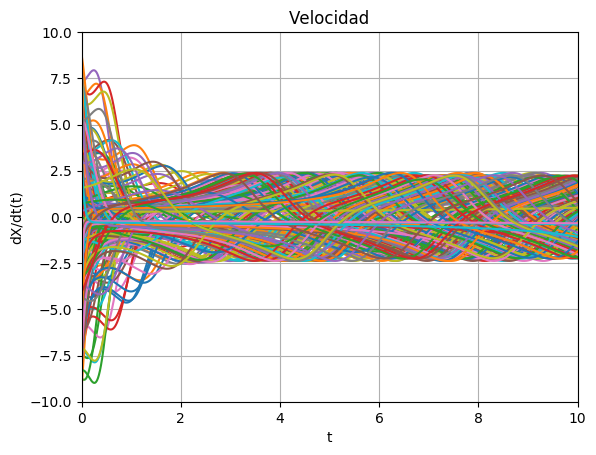

In [19]:
for i in 1:Int(round(N/4))
    X1=((rand(1)-rand(1))*L)[1]
    Y1=((rand(1)-rand(1))*L)[1]
    X0=[X1;Y1]
    DATO_i=metodo_RK4h(F,X0,Ti,L,H)
    plot(DATO_i[1],map(x->x[2],DATO_i[2]))
end
gca()[:set_xlim]((0,L))
gca()[:set_ylim]((-L,L))

title("Velocidad")
legend()
xlabel("t")
ylabel("dX/dt(t)")
grid("on")
show()

---------------
__Ejercicio 4:__ Hacer lo mismo para el sistema:
\begin{align*}
\dot x&= x+y-x (x^2+y^2)\\
\dot y &= y-x-y(x^2+y^2)
\end{align*}
Y comprobar numéricamente que hay un repulsor en $(0,0)$ y un ciclo límite (conjunto atractor) en $x^2+y^2=1$, para cotejar con lo que vimos en clase.

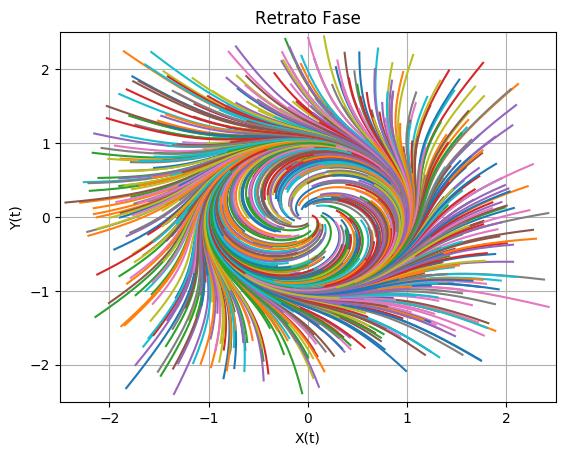

In [32]:
F3(x,t)=[x[1]+x[2]-x[1]*(x[1]^2+x[2]^2),x[2]-x[1]-x[2]*(x[1]^2+x[2]^2)]
T3i=0
T3f=2
H3=.001
N3=1000
L3=2.5
graph(F3,T3i,T3f,H3,N3,L3)

Así es posible observar lo que se buscaba.

*****
```python
F F M G
```